## Import all the required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importing the dataset

In [3]:
data_clean = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

## 1. About the data

The dataset obtained from kaggle website whose owner has extracted various flight booking options from “Ease My Trip” website which is an internet platform for booking flight tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.

The various features of the cleaned dataset are explained below:
1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

## 2. Objective of the study

The study aims at buiding a model using the linear regression and variations of it, to predict the price of the flight. It focuses on predicting the target variable as accurately as possible. So, the prediction accuracy takes precedence over the interpretablity of the model. Also, the model will be studied to understand the importances of various features in the final model.

## Data Exploration

In this step the distributions of all the features will be studied, to identify potetial anomolies and rectify them. Also encoding of certain categorical variables will be done before proceeding with model building.

In [4]:
data_clean.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# Removing the first column as it is just an index
data_clean = data_clean.drop(data_clean.columns[0],axis=1)

In [6]:
#checking the categorical columns using value_counts()
data_clean.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
data_clean.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
data_clean.days_left.value_counts().reset_index().sort_values(by='days_left',ascending=True)

,days_left,count
48,1,1927
47,2,4026
46,3,4248
45,4,5077
44,5,5392
41,6,5740
42,7,5703
40,8,5767
43,9,5665
39,10,5822


In [9]:
data_clean.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [10]:
data_clean.stops.value_counts()


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [11]:
data_clean.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [12]:
data_clean.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [13]:
data_clean['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [14]:
# No anamolies noted in categorical columns

In [15]:
data_clean.isnull().sum()
# No null values have been observed

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [16]:
#checking for infinites or 0 values in continuos variables
data_clean[(data_clean.duration==0)|(data_clean.duration==float('inf'))|(data_clean.duration==float('-inf'))].shape

(0, 11)

In [17]:
data_clean[(data_clean.price==0)|(data_clean.price==float('inf'))|(data_clean.price==float('-inf'))].shape
# the variables are clean

(0, 11)

In [18]:
data_clean.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [19]:
# checking the differences in economy and business class
# As the airlines providing services differ in both economy and business class and also because the prices differ, we need to build two separate models for economy and business classes
data_clean.groupby(['class', 'airline']).size().reset_index(name='Counts')

,class,airline,Counts
0,Business,Air_India,32898
1,Business,Vistara,60589
2,Economy,AirAsia,16098
3,Economy,Air_India,47994
4,Economy,GO_FIRST,23173
5,Economy,Indigo,43120
6,Economy,SpiceJet,9011
7,Economy,Vistara,67270


## Feature Engineering

The columns which are not ordinal have been one hot encoded to prevent the model assuming wrong relationship. The ordinal columns have been label encoded. 

In [20]:
data_reg = data_clean.copy()

data_reg.drop(columns=['flight'],inplace=True)

ohc_cols = ['airline','source_city','destination_city']
le_cols = ['class']

for col in ohc_cols:
    data_reg[col] = data_reg[col].astype(str)

data_reg = pd.get_dummies(data_reg, columns=ohc_cols, drop_first = True)

le = LabelEncoder()
for col in le_cols:
    data_reg[col] = le.fit_transform(data_reg[col])

time_encoder_dict = {'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5}

def time_encoder(time):
    return time_encoder_dict[time]

stops_encoder_dict = {'zero':0, 'one':1, 'two_or_more':2}

def stops_encoder(stops):
    return stops_encoder_dict[stops]

data_reg['departure_time'] = data_reg['departure_time'].apply(time_encoder)
data_reg['arrival_time'] = data_reg['arrival_time'].apply(time_encoder)
data_reg['stops'] = data_reg['stops'].apply(stops_encoder)

data_reg[data_reg.select_dtypes(include=['bool']).columns] = data_reg.select_dtypes(include=['bool']).astype(int)

In [21]:
#splitting the data into business and economy
data_reg_economy = data_reg[data_reg['class'] == 1]
data_reg_business = data_reg[data_reg['class'] == 0]

data_reg_economy = data_reg_economy.drop(columns = ['class'])
data_reg_business = data_reg_business.drop(columns = ['class'])

#scaling the data
minmax = MinMaxScaler()
cols_to_scale = ['departure_time','stops','arrival_time','duration','days_left']
data_reg_economy[cols_to_scale] = minmax.fit_transform(data_reg_economy[cols_to_scale])
data_reg_business[cols_to_scale] = minmax.fit_transform(data_reg_business[cols_to_scale])

## 3. Linear Regression Models

The train error is: 4922260.695888724
The test error is: 4939378.032890283
r2_score is : 0.5300508385541758


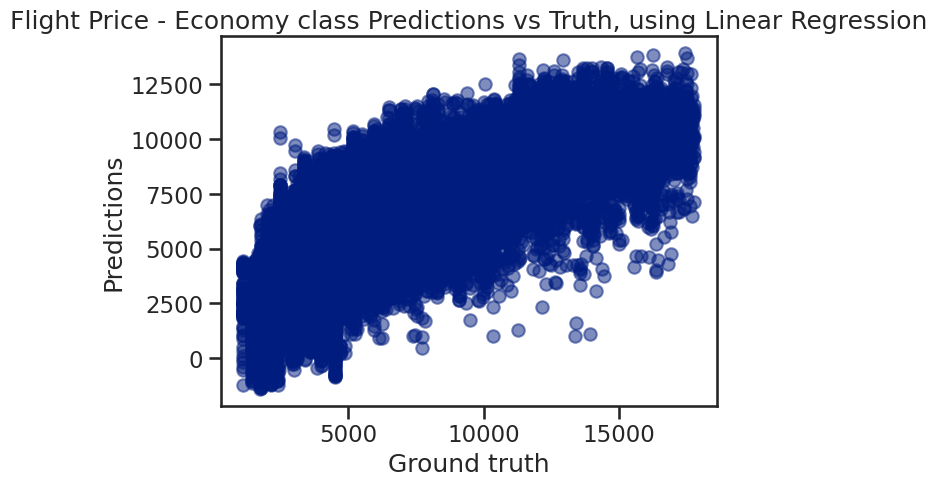

In [22]:
# Model 1 - Economy Class

y_col = 'price'
feature_cols = [x for x in data_reg_economy.columns if x!= y_col]

X_data_econ = data_reg_economy[feature_cols]
y_data_econ = data_reg_economy[y_col]

#outlier removal
y_data_econ_zscore= pd.DataFrame(y_data_econ)
y_data_econ_zscore['zscore'] = zscore(y_data_econ_zscore)
index_list = list(y_data_econ_zscore[(y_data_econ_zscore['zscore'] > 3) | (y_data_econ_zscore['zscore'] < -3)].index)

X_data_econ = X_data_econ.drop(index_list)
y_data_econ = y_data_econ.drop(index_list)

#fitting the model
X_train_econ, X_test_econ, y_train_econ, y_test_econ = train_test_split(X_data_econ,y_data_econ,random_state=42,test_size=0.3)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

LR = LinearRegression()

LR_econ = LR.fit(X_train_econ, y_train_econ)
y_train_pred_econ = LR_econ.predict(X_train_econ)
y_test_pred_econ = LR_econ.predict(X_test_econ)

train_error = mean_squared_error(y_train_econ,y_train_pred_econ)
test_error = mean_squared_error(y_test_econ,y_test_pred_econ)

r2_score_econ = r2_score(y_test_econ,y_test_pred_econ)

print(f"The train error is: {train_error}")
print(f"The test error is: {test_error}")
print(f"r2_score is : {r2_score_econ}")

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test_econ,y_test_pred_econ, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price - Economy class Predictions vs Truth, using Linear Regression');



The train error is: 78294461.54956324
The test error is: 76831596.12171794
r2_score is : 0.5146803102704935


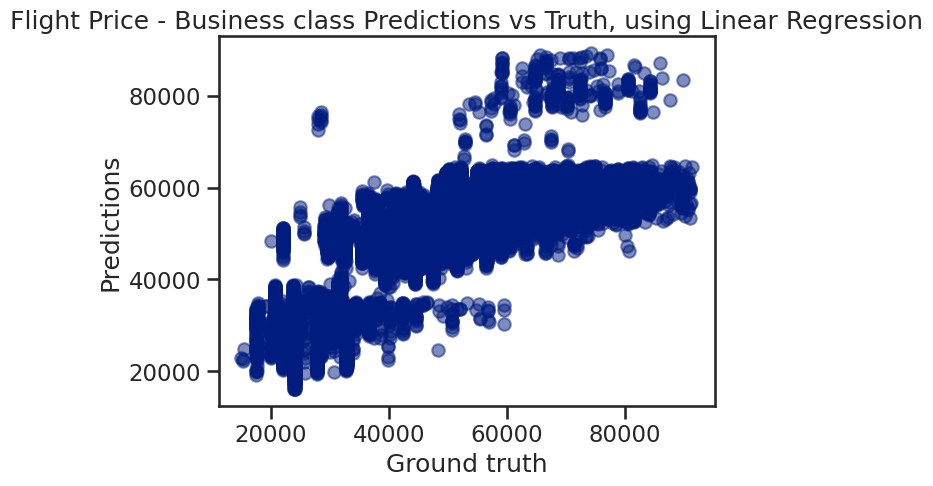

In [23]:
# Model 1 - Business Class
#dropping some airline columns for business class as they don't have the class
data_reg_business = data_reg_business.drop(columns = ['airline_GO_FIRST','airline_Indigo','airline_SpiceJet'])

#fitting the model
y_col = 'price'
feature_cols = [x for x in data_reg_business.columns if x!= y_col]

X_data_bus = data_reg_business[feature_cols]
y_data_bus = data_reg_business[y_col]

#oulier removal
y_data_bus_zscore= pd.DataFrame(y_data_bus)
y_data_bus_zscore['zscore'] = zscore(y_data_bus_zscore)
index_list = list(y_data_bus_zscore[(y_data_bus_zscore['zscore'] > 3) | (y_data_bus_zscore['zscore'] < -3)].index)

X_data_bus = X_data_bus.drop(index_list)
y_data_bus = y_data_bus.drop(index_list)

X_train_bus, X_test_bus, y_train_bus, y_test_bus = train_test_split(X_data_bus,y_data_bus,random_state=42,test_size=0.3)

LR = LinearRegression()

LR_bus = LR.fit(X_train_bus, y_train_bus)
y_train_pred_bus = LR_bus.predict(X_train_bus)
y_test_pred_bus = LR_bus.predict(X_test_bus)

train_error = mean_squared_error(y_train_bus,y_train_pred_bus)
test_error = mean_squared_error(y_test_bus,y_test_pred_bus)

r2_score_bus = r2_score(y_test_bus,y_test_pred_bus)

print(f"The train error is: {train_error}")
print(f"The test error is: {test_error}")
print(f"r2_score is : {r2_score_bus}")


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test_bus, y_test_pred_bus, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price - Business class Predictions vs Truth, using Linear Regression');



In [24]:
#generating the cross validation fit to see if the model is overfitting
# model 2 - Economy Class
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

lr_cv = LinearRegression()

y_pred_econ_cv = cross_val_predict(lr_cv,X_data_econ,y_data_econ, cv=kf)

r2_score_cv = r2_score(y_data_econ,y_pred_econ_cv)

print(f"R2 score using cross validation is {r2_score_cv}")

R2 score using cross validation is 0.5305248972748005


In [25]:
#model 2 - business class
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

lr_cv_bus = LinearRegression()

y_pred_bus_cv = cross_val_predict(lr_cv_bus,X_data_bus,y_data_bus, cv=kf)

r2_score_cv_bus = r2_score(y_data_bus,y_pred_bus_cv)

print(f"R2 score using cross validation is {r2_score_cv_bus}")

R2 score using cross validation is 0.5120168698122495


0.6722188248296439


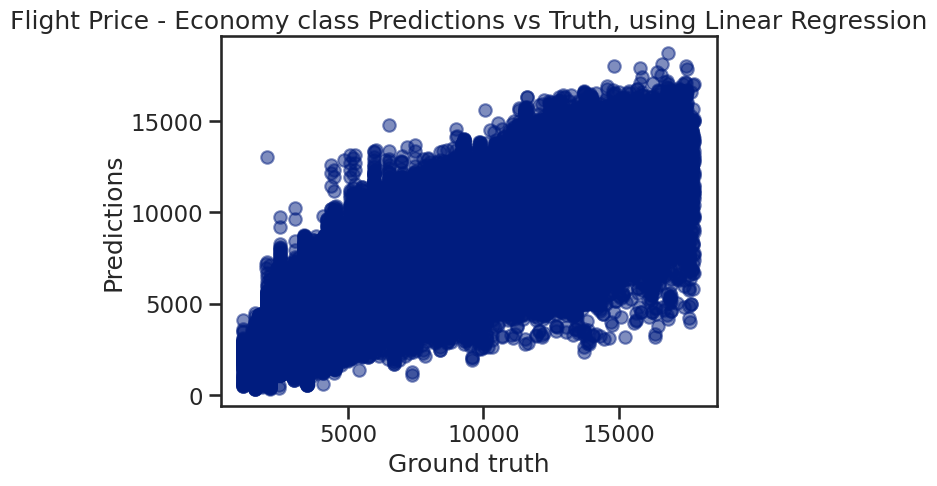

In [26]:
# The R2 scores are very similar to regular train test split, which means there is no overfitting but the r2 score value needs to increase.
# Maybe the model fit is more complex. Need to use polynomial regression

# Model 3 - Economy Class
estimator = Pipeline([('make higher degree',PolynomialFeatures(degree=2)), ('Linear',LinearRegression())])

y_pred_econ_poly_cv = cross_val_predict(estimator,X_data_econ,y_data_econ, cv=kf)

r2_score_econ = r2_score(y_data_econ, y_pred_econ_poly_cv)

print(r2_score_econ)

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_data_econ, y_pred_econ_poly_cv, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price - Economy class Predictions vs Truth, using Linear Regression');

0.6221271421437364


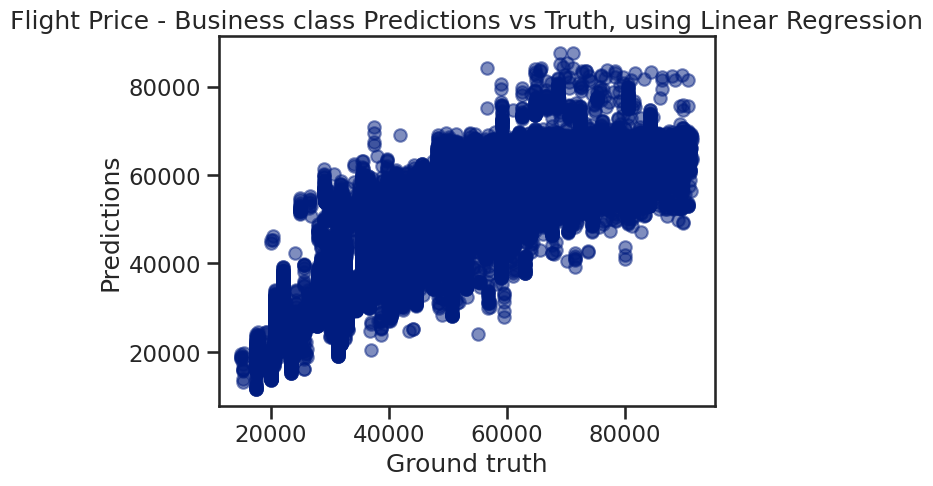

In [27]:
#Model 3 - Business Class

estimator = Pipeline([('make higher degree',PolynomialFeatures(degree=2)), ('Linear',LinearRegression())])

y_pred_bus_poly_cv = cross_val_predict(estimator,X_data_bus,y_data_bus, cv=kf)

r2_score_bus = r2_score(y_data_bus, y_pred_bus_poly_cv)

print(r2_score_bus)

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_data_bus, y_pred_bus_poly_cv, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price - Business class Predictions vs Truth, using Linear Regression');

## 4. Insights and Key findings

1. The provided data is very clean, not much treatment was required. The categorical variables have been encoded appropriately before fitting the model.
2. Outliers have been removed whose absolute zscore is greater than 3
3. Scaling of the variables has been done to get the correct feature importances.
4. The economy and business classes have been separated because the predictor variable is very different for both and all the airlines don't have both the classes.
5. Initially a basic linear model has been fitted for both economy and business classes, which gave very poor results. This indicated that the relationship might not be linear. Also there is slight difference in the train and test error.
6. Another linear model has been fitted with 3 fold cross validation split. It gave a similar result as the basic model.
7. Fitted a 3rd model, this time with polynomial regression of second degree. This gave a huge bump in R2 score, indicating that the relation is not linear. This model is the best fit that can be generated with the given data and with variations of linear regression

## 5. Next Steps

1. The model can benifit from more features like date of booking and date of travel. Features like weekend, weekday or holidays can be extracted from that which can be very good predictors.
2. As the r2 score is improving from more complex models, neural networks can be tried out on this to get more accurate predictions.